In [12]:
import numpy as np
from pandas import DataFrame as DF
import matplotlib.pyplot as plt

# 编程 7.1-1(a)

In [13]:
def RKF45(f, a, b, tol, y_0):
    h = b - a
    
    t_i = a
    w_i = np.array(y_0)
    t = [t_i]
    w = [w_i]
    doubled = False
        
    while t_i < b:
        s_1 = f(t_i, w_i)
        s_2 = f(t_i + h/4, w_i + h*s_1/4)
        s_3 = f(t_i + h*3/8, w_i + h*s_1*3/32 + h*s_2*9/32)
        s_4 = f(t_i + h*12/13, w_i + h*s_1*1932/2197 - h*s_2*7200/2197 + 
                h*s_3*7296/2197)
        s_5 = f(t_i + h, w_i + h*s_1*439/216 - h*s_2*8 + h*s_3*3680/513 -
               h*s_4*845/4104)
        s_6 = f(t_i + h/2, w_i - h*s_1*8/27 + h*s_2*2 - h*s_3*3544/2565 + 
               h*s_4*1859/4104 - h*s_5*11/40)

        w_ii = w_i + h*(s_1*25/216 + s_3*1408/2565 + s_4*2197/4104 - s_5/5)
        z_ii = w_i + h*(s_1*16/135 + s_3*6656/12825 + s_4*28561/56430 -
                        s_5*9/50 + s_6*2/55)
        e_ii = abs(w_ii - z_ii)
        
        rel_error = abs(np.max(e_ii / w_ii))
        if doubled:
            doubled = False
            pass
        elif rel_error > tol:
            h *= 0.8 * pow(tol / rel_error, 1/5)
            continue
        elif t_i + h > b:
            h = b - t_i
            continue

        t_i += h
        w_i = z_ii
        t.append(t_i)
        w.append(w_i)
        
        if (rel_error < tol/10) & (t_i + h < b):
            h *= 2
            doubled = True
    
    return t, np.array(w).T

In [14]:
def find_interval(f, a, b, tol, y_boundary,smin=-2, smax=2, count=1000, find_y2=False):
    y_a, y_b = y_boundary

    for num in range(count):
        s_interval = (smax-smin)*np.random.rand(2) + smin
        s_interval.sort()
        test = 1

        for s in s_interval:
            y_0 = (y_a, s)
            t, y = RKF45(f, a, b, tol, y_0)
            test *= (y[int(find_y2)][-1] - y_b)

        if test < 0:
            return s_interval.tolist()
    
    return False

In [15]:
def Shooting(f, a, b, tol, y_boundary, s_interval, find_y2=False):
    s0, s1 = s_interval
    y_a, y_b = y_boundary
    F_s = [0] * 2

    for i in range(2):
        s = s_interval[i]
        y_0 = (y_a, s)
        t, y = RKF45(f, a, b, tol, y_0)
        F_s[i] = y[int(find_y2)][-1] - y_b
    
    while True:
        c = (s0 + s1) / 2
        if s1 - s0 < tol:
            break

        y_0 = (y_a, c)
        t, y = RKF45(f, a, b, tol, y_0)
        temp = y[int(find_y2)][-1] - y_b

        if temp * F_s[0] > 0:
            s0 = c
            F_s[0] = temp
            continue
        elif temp * F_s[1] > 0:
            s1 = c
            F_s[1] = temp
            continue
        else:
            break
    y_0 = (y_a, c)
    tt,ww=RKF45(f, a, b, tol, y_0)
    
    return tt,ww,(s0+s1)/2

In [16]:
tol = 5e-8
a, b = 0, 1
y_boundary = 0, 1/3*np.e

def f(t, y):
    y1, y2 = y
    return np.array([y2, y1+2/3*np.exp(t)])

s_interval = find_interval(f, a, b, tol, y_boundary , count=10 , find_y2=False)
print("Initial Interval: [%.4f, %.4f]" % (s_interval[0], s_interval[1]))

Initial Interval: [-1.0710, 1.6935]


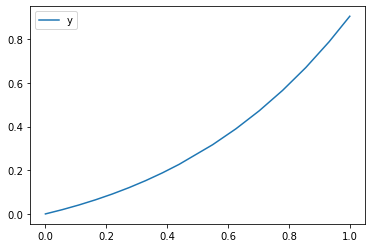

In [8]:
t, y, s = Shooting(f, a, b, tol, y_boundary, s_interval , find_y2=False)

plt.plot(t, y[0], label="y")
plt.legend()

# 编程 7.1-3(a)

In [ ]:
tol = 5e-8
a, b = 1, 2
y_boundary = 1/3 , 1/12

def f(t, y):
    y1, y2 = y
    return np.array([y2, 18*y1**2])

s_interval = find_interval(f, a, b, tol, y_boundary, smin=-100, smax=100, count=100, find_y2=False)
print("Initial Interval: [%.4f, %.4f]" % (s_interval[0], s_interval[1]))

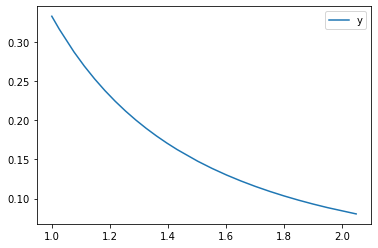

In [35]:
t, y, s = Shooting(f, a, b, tol, y_boundary, s_interval , find_y2=False)

plt.plot(t, y[0], label="y")
plt.legend()